In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

from scipy.optimize import curve_fit

import time

import os

# Read from file

In [2]:
filepath = "data/1.75g/1.75g@15Hz.csv"

df = pd.read_csv(filepath)
#print(df)

kick out spurious particles which do not move at at all for more than 10 frames in a row

# Extract velocities

In [3]:
v = df['speed']
v = np.array([e for e in v if not np.isnan(e)])

vx = df['vx']
vx = np.array([e for e in vx if not np.isnan(e)])

vy = df['vy']
vy = np.array([e for e in vy if not np.isnan(e)])

print(len(vx))

53192


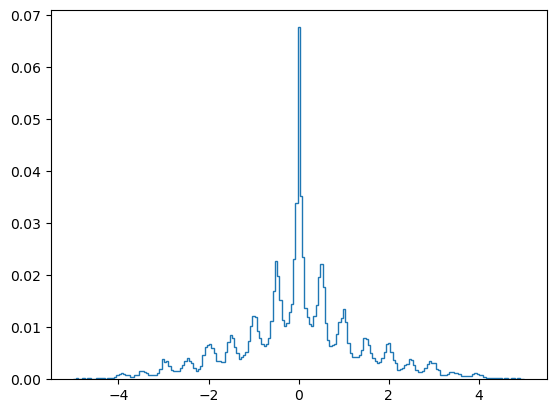

In [25]:
def histogram_norm(v, bins):
    total_counts = len(v)
    counts = np.zeros(len(bins)-1, dtype=int)
    for e in v:
        for i in range(len(bins)-1):
            if e >= bins[i] and e < bins[i+1]:
                counts[i] += 1

    return counts/total_counts

bs = np.linspace(-5, 5, 200)
c_x = histogram_norm(vx, bs)

plt.stairs(c_x, bs)
plt.show()

In [11]:
print(len(vx)==len(vy))

True


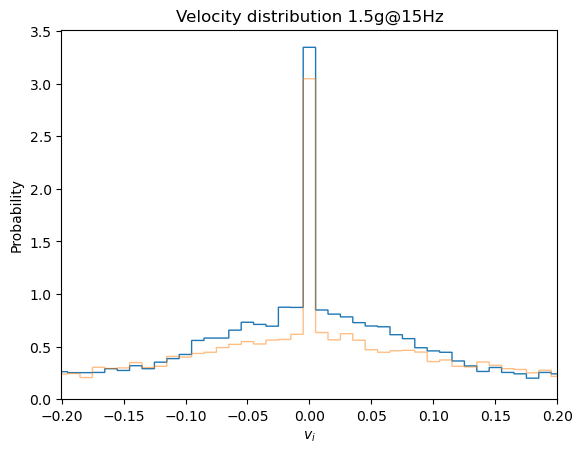

0.010010010010010006


In [37]:
bins = np.linspace(-5, 5, 1000)
dv = bins[1]-bins[0]

total_counts = float(len(vx))

counts_vx, bins = np.histogram(vx, bins=bins, density=True) # normalised
counts_vy, bins = np.histogram(vy, bins=bins, density=True) # normalised

prob_vx = counts_vx/total_counts
prob_vy = counts_vy/total_counts

plt.stairs(counts_vx, bins)
plt.xlabel("$v_i$")
plt.ylabel("Probability")
plt.title("Velocity distribution 1.5g@15Hz")

plt.stairs(counts_vy, bins, alpha=0.5)
#plt.savefig("figs/funky_distribution.png")

plt.xlim(-20*dv, 20*dv)
plt.show()

print(dv)

we see that there is actually an extrememly sharp peak at center, only a single bin

In [19]:
er = np.linspace(-5, 5, 200)
print(bins == counts_vx)

ValueError: operands could not be broadcast together with shapes (200,) (199,) 

In [8]:
def maxwellian(vx, sigma): # for velocity component
    return 1/(np.sqrt(2*np.pi*sigma**2))*np.exp(-vx**2/(2*sigma**2))

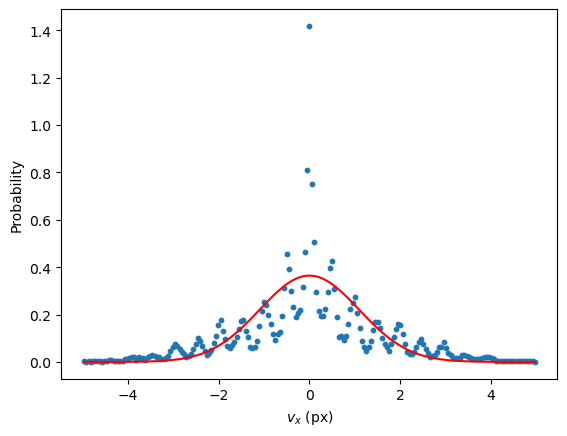

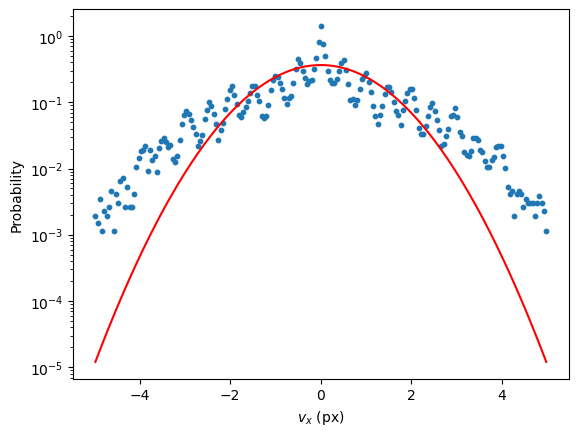

In [9]:

v_space = np.array([(bins[i-1]+bins[i])/2 for i in range(1, len(bins))])

popt, pcov = curve_fit(maxwellian, v_space, counts_vx)

plt.plot(v_space, maxwellian(v_space, popt[0]), c='r')
plt.scatter(v_space, counts_vx, s=10)
plt.xlabel("$v_x$ (px)")
plt.ylabel("Probability")
#plt.title("$v_x$ distribution (lin)")
#plt.savefig("figs/v_lin.png", dpi=300)
plt.show()

plt.plot(v_space, maxwellian(v_space, popt[0]), c='r')
plt.scatter(v_space, counts_vx, s=10)
plt.xlabel("$v_x$ (px)")
plt.ylabel("Probability")
plt.yscale('log')
#plt.title("$v_x$ distribution (log)")
#plt.savefig("figs/v_log.png", dpi=300)
plt.show()